Representation learning / Transfer learning

In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from keras.applications.imagenet_utils import decode_predictions

import numpy as np

Using TensorFlow backend.


In [2]:
from scipy.misc import toimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Check gpu

In [3]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# Classification with Inception V3 and ResNet50

In [4]:
inception_model = InceptionV3(weights='imagenet', include_top=True)

In [5]:
resnet_model = ResNet50(weights="imagenet")

#### Load image for classification

In [6]:
# img_path = 'D:/pictures/2017-09/brat.jpg'
# img_path = "D:/pictures/iphone May 2017/IMG_2109.JPG"
# img_path = "D:/house.jpg"
# img_path = "D:/pictures/Tioman April 2017/GOPR0025.JPG"
# img_path = "D:/pictures/Tioman April 2017/GOPR0041.JPG"
img_path = "D:/pictures/Tioman April 2017/GOPR0095.JPG"
# img_path = "D:/pictures/Italy April 2015/IMG_0624.JPG"
# img_path = "D:/pictures/Italy April 2015/IMG_0664.JPG"
# img_path = "D:/pictures/Italy April 2015/IMG_0349.JPG"

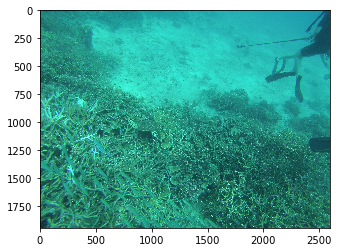

In [7]:
plt.imshow(mpimg.imread(img_path))

In [8]:
img_inception = image.load_img(img_path, target_size=(299, 299))
img_resnet = image.load_img(img_path, target_size=(224, 224))

### Images are blue

https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

In [9]:
x_inception = image.img_to_array(img_inception)
x_resnet = image.img_to_array(img_resnet)

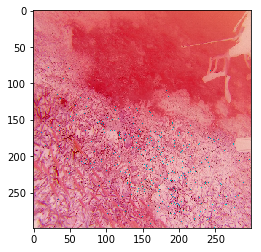

In [10]:
plt.imshow(x_inception)

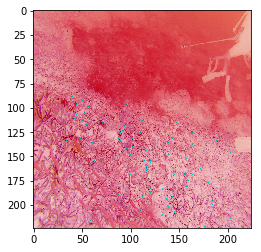

In [11]:
plt.imshow(x_resnet)

### Preprocess images

In [12]:
x_inception_processed = np.expand_dims(x_inception, axis=0)
x_inception_processed = inception_preprocess_input(x_inception_processed)

In [13]:
x_resnet_processed = np.expand_dims(x_resnet, axis=0)
x_resnet_processed = resnet_preprocess_input(x_resnet_processed)

#### Predict image

In [14]:
preds_inception = inception_model.predict(x_inception_processed)

In [15]:
preds_resnet = resnet_model.predict(x_resnet_processed)

#### Intepret predictions

In [16]:
def showPredictions(preds, top=3):
    
    decoded_preds =decode_predictions(preds, top)[0]

    print("code\tname\tprob")
    for pred in decoded_preds:
        print("%s\t%s\t%.5f" % (pred[0], pred[1], pred[2]))

In [17]:
showPredictions(preds_inception)

code	name	prob
n10565667	scuba_diver	0.68447
n09256479	coral_reef	0.15283
n01751748	sea_snake	0.01835


In [18]:
showPredictions(preds_resnet)

code	name	prob
n04606251	wreck	0.33052
n10565667	scuba_diver	0.30469
n09256479	coral_reef	0.12347
